# Supervised Learning

Predict a certain outcome from a given input.

### Classification and Regression

Classification $\to$ Multiclass Classification (binary classification is a particular case).

Regression $\to$ Continuos numerical quantity.

### Generalization, Overfitting and Underfitting

#### Generalization
Build a model on the training set and then be able to make predictions on new data. 

<a href="#/3/1">(Index 1)</a>
<a href="#/56/1">(Index 2)</a>

#### Overfitting
Building a model that is too complex for the amount of available information.

#### Underfitting
Choosing a too simple model.

#### Relation of Model Complexity to Dataset Size
Having more data and building appropiately more complex models.
However data alone is not enough.

Always remember:

1. The *curse of dimensionality* and the *blessing of non-uniformity*.

2. No free-lunch theorem.

![png](./images/02-overfitting_underfitting.png)

**Figure 1:** Trade-off of model complexity againts *training* and *test* accuracy.


### Supervised Machine Learning Algorithms

In this first part we are going to explore using examples the main algorithms for supervised
learning:

1\. <a href="#/7/1">k-nearest neighbors (KNN)</a>:
   * for classification.
   * for regression.
   
2\. <a href="#/12/1">Linear Models</a>:
   * <a href="#/13/1">for Regression</a>:
       * Linear regression *aka* least squares.
       * Ridge.
       * Lasso.
       * Elastic Net.
   * <a href="#/18/1">for Classification</a>:
       * Logistic regression.
       * Linear Suppor Vector Machines.
       * Linear models for multiclass classification.

3\. <a href="#/25/1">Naive-Bayes Classifiers</a>:
   * GaussianNB
   * BernoulliNB
   * MultinomialNB

4\. <a href="#/30/1">Decision Trees</a>:
   * for classification.
   * for regression.
    
5\. <a href="#/36/1">Ensembles of Decision Trees</a>:
   * Random Forest.
   * Gradient Boosted Decision Trees.
    
6\. <a href="#/42/1">Kernelized Support Vector Machines</a>

### The Abalone dataset

#### The main question:

<p>
Predict the age of abalone from physical measurements
 <img src="./images/02-abalon.jpg" style="width:100px">
</p>

#### Data Set Information:

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

#### Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem. 

Name |            Data Type|       Meas.|   Description
-|-|-|-
Sex           |  nominal    |           |  M, F, and I (infant)
Length        |  continuous |     mm    |   Longest shell measurement
Diameter      |  continuous |     mm    |  perpendicular to length
Height        |  continuous |     mm    |  with meat in shell
Whole weight  |  continuous |     grams |  whole abalone
Shucked weight|  continuous |     grams |  weight of meat
Viscera weight|  continuous |     grams |  gut weight (after bleeding)
Shell weight  |  continuous |     grams |  after being dried
Rings         |  integer    |           |  +1.5 gives the age in years

more info [here](https://archive.ics.uci.edu/ml/datasets/Abalone)

In [202]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [203]:
names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv('data/abalone.data',header=None,names=names)

In [204]:
# We add a Years column  
df['Years'] = df['Rings'] + 1.5
# We change the M,F and I categorical variables as numerical using 0,1 and 2.
replace_list = {"Sex" : {"M": 0, "F" : 1, "I": 2}}
df.replace(replace_list,inplace=True)
# We inspect the dataset
#df

In [205]:
# Here we turn into numpy arrays
X = df.iloc[:,:8].values
y_cls = df.iloc[:,8].values
y_reg = df.iloc[:,9].values

# *k*-Nearest Neighbors 

The most intuitive algorithm.

There are two versions:

## *k*-Neighbors for classification and  *k*-Neighbors for regression

<a href="#/3/1">(Index)</a>

<img src="./images/02-knns.png" alt="Drawing" style="width: 1500px;"/>

In [206]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cls, random_state=0)

In [207]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)

In [208]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [209]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.24


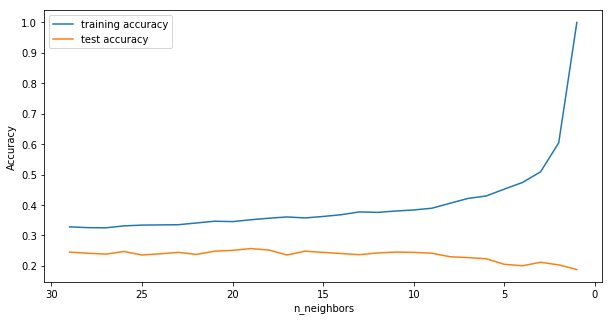

In [210]:
#Abalon Dataset

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15
neighbors_settings = list(range(1, 30))
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
# record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(10,5))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.gca().invert_xaxis()
plt.legend()

In [211]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, random_state=0)
reg = KNeighborsRegressor(n_neighbors=10)

In [212]:
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [213]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.56


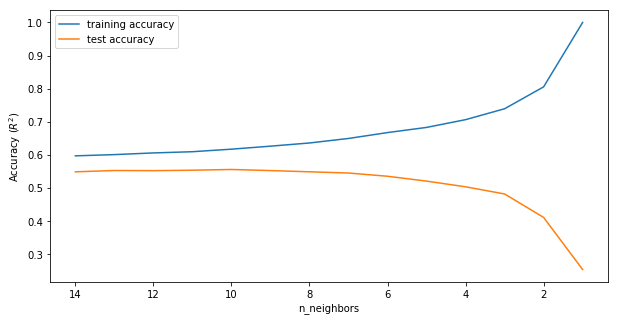

In [214]:
# Abalon dataset

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15
neighbors_settings = list(range(1, 15))
for n_neighbors in neighbors_settings:
# build the model
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(reg.score(X_train, y_train))
# record generalization accuracy
    test_accuracy.append(reg.score(X_test, y_test))

plt.figure(figsize=(10,5))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy ($R^2$)")
plt.xlabel("n_neighbors")
plt.gca().invert_xaxis()
plt.legend()

## Conclusions on the *KNN* algorithms

* Two important parameters: the number of neighbors and how you measure the distance between points. By default is the Minkowski with p=2.

$$ d(\mathbf{x},\mathbf{y}) = \left[\sum_{i=1}^N (x_i - y_i)^p \right]^{\frac{1}{p}} $$

* It is a model easy to understand. But its perform is poor on large datasets (either in number of features or in number of samples).





# Linear Models

Linear models make a prediction using a linear function of the input features.


## Linear models for regression and linear models for classification.

$$\hat{y}(\mathbf{w},\mathbf{x}) = w_0 +  w_1 * x_1 + w_2 * x_2 + ... + w_p * x_p $$

<a href="#/3/1">(Index)</a>

## Linear Models for Regression

   * Ordinary Least squares
   $$ \underset{w}{min\,} {|| X w - y||_2}^2  $$
      
   * Ridge (L2 regularization)
   $$  \underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2} $$
   
   * Lasso (L1 regularization)
   $$ \underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1} $$
   
   
If $X$ is a matrix of size $(n, p)$ this methods have a cost of $O(n p^2)$, assuming that $n \geq p$.

   * Elastic Net (L2 and L1 regularization)
   $$ \underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2} $$


In [215]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.53
Test set score: 0.54


In [216]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.53
Test set score: 0.54


In [217]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.48
Test set score: 0.51


In [218]:
ridge01 = Ridge(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.53
Test set score: 0.54


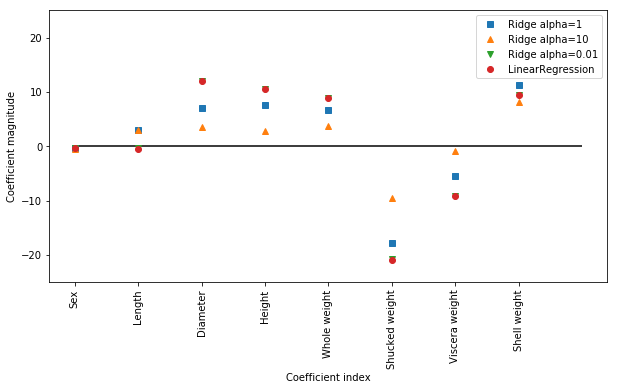

In [219]:
plt.figure(figsize=(10,5))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.01")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xticks(range(len(names)-1), names, rotation=90)
plt.hlines(0, 0, range(len(names)-1))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [220]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import learning_curve, KFold


def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(
        est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                    label="training " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
             label="test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score (R^2)')
    plt.ylim(0, 1.1)


def plot_ridge_n_samples(X,y,alpha=1):
    plot_learning_curve(Ridge(alpha=alpha), X, y)
    plot_learning_curve(LinearRegression(), X, y)
    plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

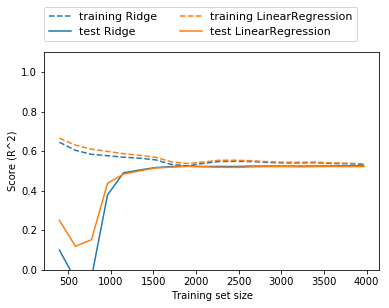

In [221]:
# Learning curves
plot_ridge_n_samples(X,y_reg,alpha=1)

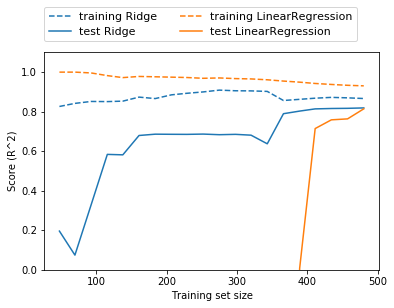

In [222]:
X_b, y_b = mglearn.datasets.load_extended_boston()
plot_ridge_n_samples(X_b,y_b,alpha=1)

In [223]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, random_state=42)

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


In [224]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.51
Test set score: 0.52
Number of features used: 6


In [225]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.53
Test set score: 0.54
Number of features used: 7


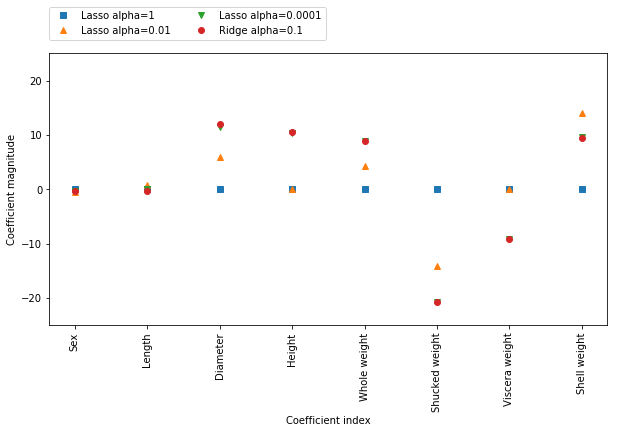

In [226]:
plt.figure(figsize=(10,5))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.xticks(range(len(names)-1), names, rotation=90)
plt.hlines(0, 0, range(len(names)-1))
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## Linear Models for Classification

* Logistic Regression (with L1 or L2 regularization)
$$\underset{w, c}{min\,} \|w\|_1 \quad or\quad \underset{w, c}{min\,} \frac{1}{2}w^T w  \quad + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) .
$$

* Linear Support Vector Machines  (for $x_i \in \mathbb{R}^p, i=1,…, n,$ and $y \in \{1, -1\}^n$)
$$ \min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i \quad \textrm {subject to }\quad  y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i,\\  \zeta_i \geq 0, i=1, ..., n $$



In [227]:
# Reformulate the problem using the Abalone dataset, now binary Male or Female is the target.
#First remove the rows for Sex I (Infant) = 2.

df_bin = df[df.Sex !=2]

# Here we turn into numpy arrays
X_bin = df_bin.iloc[:,1:].values
y_bin = df_bin.iloc[:,0].values

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.562
Test set score: 0.557


In [229]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.560
Test set score: 0.556


In [230]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.540
Test set score: 0.536


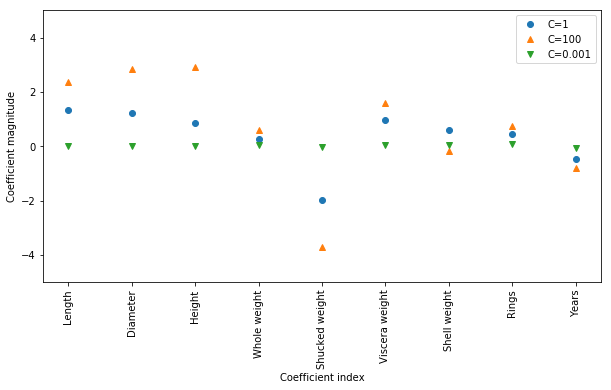

In [231]:
new_names = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings','Years']

# Logistic Regression with L2 regularization
plt.figure(figsize=(10,5))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(len(new_names)), new_names, rotation=90)
plt.hlines(0, 0, range(len(new_names)))
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

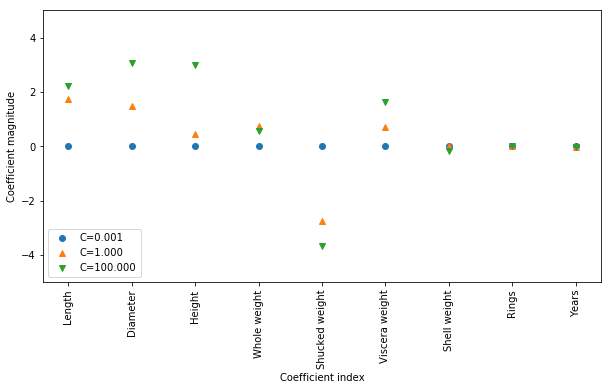

In [232]:
# Logistic Regression with L1 regularization
plt.figure(figsize=(10,5))
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    #print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        #C, lr_l1.score(X_train, y_train)))
    #print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        #C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(len(new_names)), new_names, rotation=90)
plt.hlines(0, 0, range(len(new_names)))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

# Linear models for multiclass classification

* one-vs.-rest approach

In [233]:
#df

In [234]:
# Here we include the M,F and I as 3 classes.
# Here we turn into numpy arrays
X_mul = df.iloc[:,1:].values
y_mul = df.iloc[:,0].values

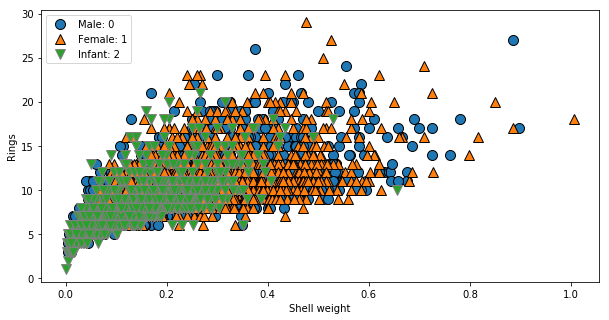

In [235]:
features=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings','Years']

n,m = 6,7

plt.figure(figsize=(10,5))
mglearn.discrete_scatter(X_mul[:, n], X_mul[:, m], y_mul)
plt.xlabel(features[n])
plt.ylabel(features[m])
plt.legend(["Male: 0", "Female: 1", "Infant: 2"])

In [236]:
linear_svm = LinearSVC().fit(X_mul[:,n:m+1], y_mul)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


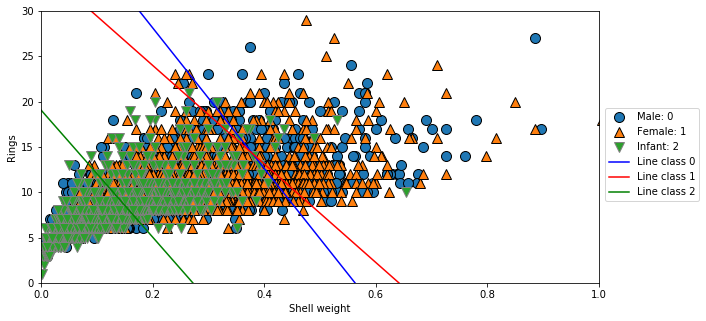

In [237]:
plt.figure(figsize=(10,5))
mglearn.discrete_scatter(X_mul[:, n], X_mul[:, m], y_mul)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(0, 30)
plt.xlim(0, 1)
plt.xlabel(features[n])
plt.ylabel(features[m])
plt.legend(['Male: 0', 'Female: 1', 'Infant: 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

# Conclusions about Linear Models

* The main parameter of linear models is the regularization parameter (L1 or L2). If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important.

* Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data.

* Linear models often perform well when the number of features is large compared to the number of samples.

# Naive-Bayes Classifiers

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features.
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)} {P(x_1, \dots, x_n)}
 $$

Because the argument of independency

$$ P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y) \\
\Downarrow \\
\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),
$$

<a href="#/3/1">(Index)</a>

## NB Family
*  **Gaussian Naive Bayes**:
$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right) $$

* **Multinomial Naive Bayes**:
   The distribution is parametrized by vectors $\theta_y = (\theta_{y1},\ldots,\theta_{yn})$ for each class $y$,
$$ \hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n} $$
   where $N_{yi} = \sum_{x \in T} x_i$ is the number of times feature $i$ appears in a sample of class $y$ in the training set $T$, and $N_{y} = \sum_{i=1}^{|T|} N_{yi}$ is the total count of all features for class $y$.
   
* **Bernoulli Naive Bayes:** Multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable.
$$P(x_i \mid y) = P(i \mid y) x_i + (1 - P(i \mid y)) (1 - x_i)$$


In [238]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_mul,y_mul).predict(X_mul)

print("Number of mislabeled points out of a total {} points : {}".format(X_mul.shape[0],(y_mul != y_pred).sum()))

Number of mislabeled points out of a total 4177 points : 1989


In [239]:
X_train, X_test, y_train, y_test = train_test_split(X_mul, y_mul, random_state=42)
gnb_fit = gnb.fit(X_train, y_train)
print("Training set score: {:.3f}".format(gnb_fit.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gnb_fit.score(X_test, y_test)))


Training set score: 0.517
Test set score: 0.525


# Conclusions about NB Classifiers

*  GaussianNB is mostly used on very high-dimensional data, while the other two variants of naive Bayes are widely used for sparse count data such as text. MultinomialNB usually performs better than BinaryNB , particularly on datasets with a relatively large number of nonzero features (i.e., large documents).

* The naive Bayes models share many of the strengths and weaknesses of the linear models. They are very fast to train and to predict, and the training procedure is easy to understand.

# Decision Trees
Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision.

<img src="./images/02-DT.png" alt="Drawing" style="width: 500px;"/>

**Figure 2**. A decision tree to distinguish among several animals

<a href="#/3/1">(Index)</a>

In [240]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_bin,y_bin, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.536


In [241]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.563
Accuracy on test set: 0.539


In [242]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["Male", "Female"],
feature_names=new_names, impurity=False, filled=True)

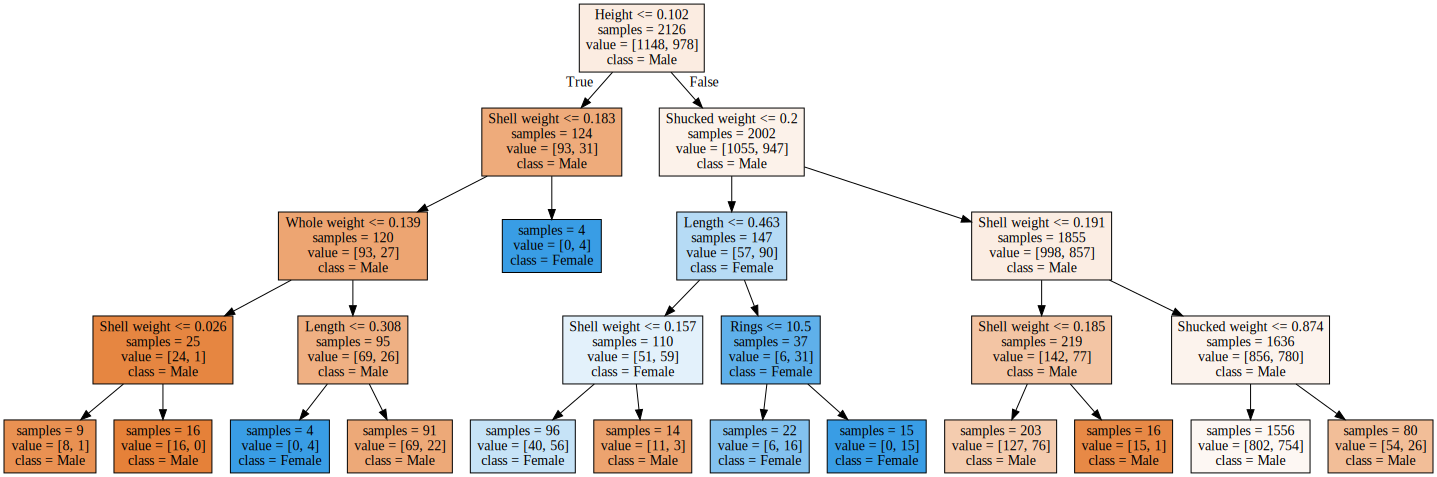

In [243]:
# Note: you should install graphviz in your system. 
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [244]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.18282451  0.          0.22500703  0.04186971  0.19418066  0.
  0.33041838  0.02569971  0.        ]


In [245]:
def plot_feature_importances_cancer(model):
    n_features = X_bin.shape[1]
    plt.figure(figsize=(10,5))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), new_names)
    plt.title('Feature importance for Abalon dataset M/F')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

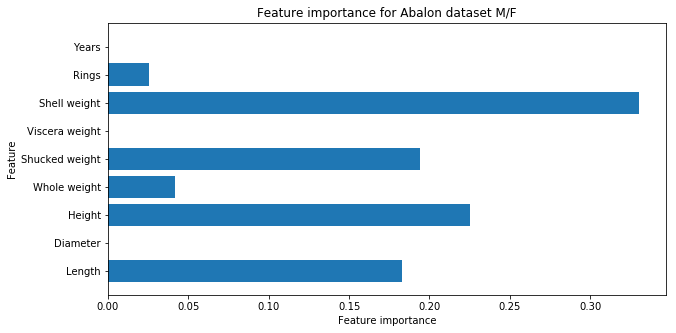

In [246]:
plot_feature_importances_cancer(tree)

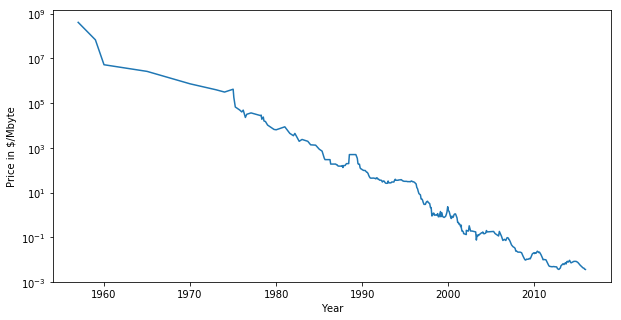

In [247]:
# Decision trees for regression

import pandas as pd
ram_prices = pd.read_csv("data/ram_price.csv")
plt.figure(figsize=(10,5))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [248]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

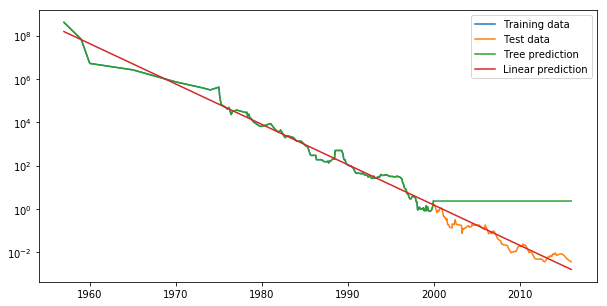

In [249]:
plt.figure(figsize=(10,5))
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

# Conclusions about Decision Trees Classifier

* One of the main drawbacks of decision trees is the tendency to overfit and provide poor generalization performance.

* Usually, picking one of the pre-pruning strategies by setting either *max_depth* , *max_leaf_nodes* , or   *min_samples_leaf* is sufficient to prevent overfitting.

* The resulting model can easily be visualized and understood by nonexperts (at least for smaller trees), and the algorithms are completely invariant to scaling of the data.

* Decision trees do not have the ability to generate *new* responses, outside of what was seen in the training data. This shortcoming applies to all models based on trees.


# Ensembles of Decision Trees

Ensembles are methods that combine multiple machine learning models to create more powerful models.

* Random forests

* Gradient boosted regression trees (gradient boosting machines)

<a href="#/3/1">(Index)</a>

In [250]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_mul,y_mul, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.556


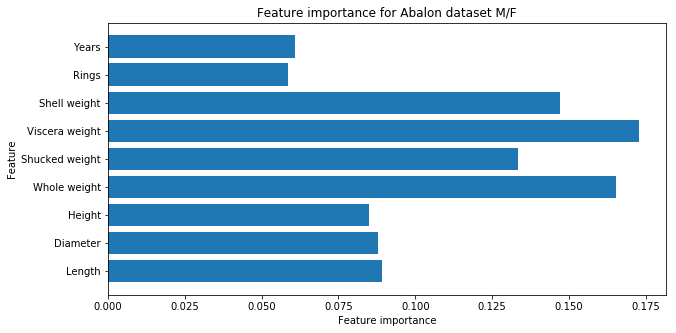

In [251]:
# Feature Importance for Random Forest
plot_feature_importances_cancer(forest)

## Conclusions about Random Forest

* Random forests for regression and classification are currently among the most widely used machine learning methods.

* Easy parallelization.

* Random forests don’t tend to perform well on very high dimensional, sparse data, such as text data. For this kind of data, linear models might be more appropriate.

# Gradient boosted regression trees (gradient boosting machines)

* The gradient boosted regression tree is another ensemble method that combines multiple decision trees to create a more powerful model.

* Use for both regression and classification. 

* Gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one.

* Combine many simple models like shallow trees.

<a href="#/3/1">(Index)</a>

In [252]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_mul,y_mul, random_state=42)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.718
Accuracy on test set: 0.568


In [253]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.577
Accuracy on test set: 0.562


In [254]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.602
Accuracy on test set: 0.575


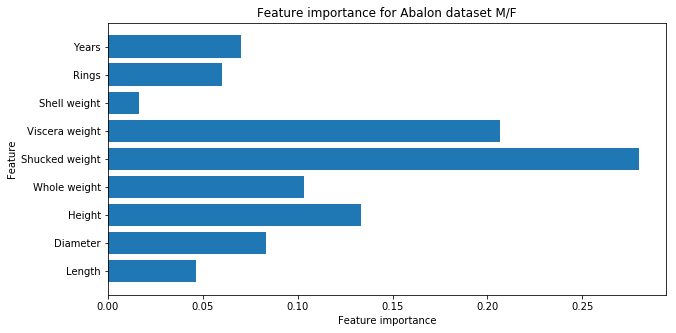

In [255]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

## Conclusions about Gradient boosted regression trees

* They are among the most powerful and widely used models for supervised learning. 

* Their main drawback is that they require careful tuning of the parameters and may take a long time to train.

* They are usually the winner methods in competitions such as Kaggle.


# Kernelized Support Vector Machines

Kernelized support vector machines (SVMs) are an extension of Linear Support Vector Machines that allows for more complex models that are not defined simply by hyperplanes in the input space.

<a href="#/3/1">(Index)</a>

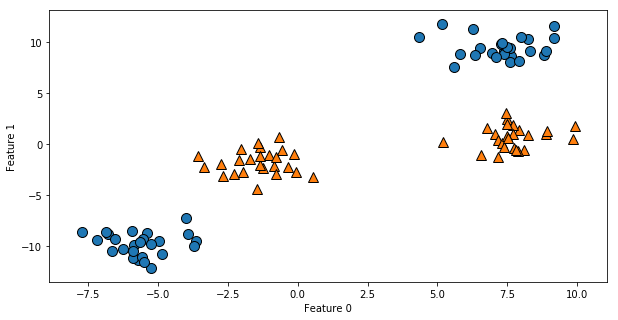

In [256]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2
plt.figure(figsize=(10,5))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

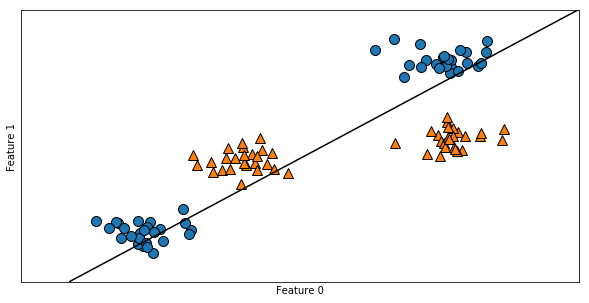

In [257]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
plt.figure(figsize=(10,5))
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

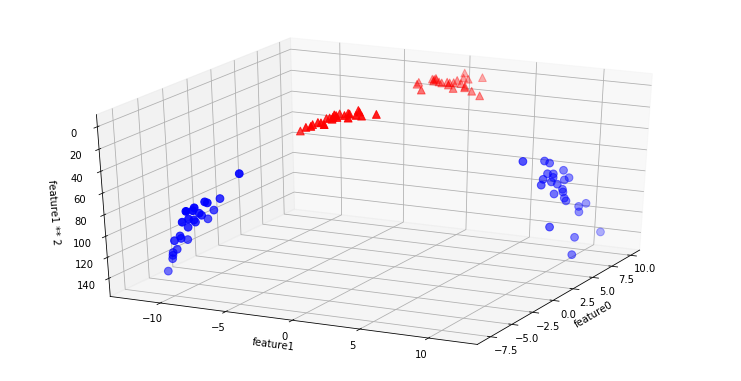

In [258]:
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure(figsize=(10,5))
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

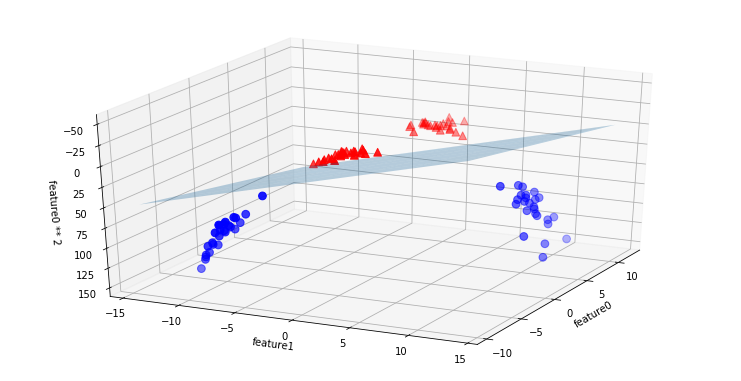

In [259]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure(figsize=(10,5))
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

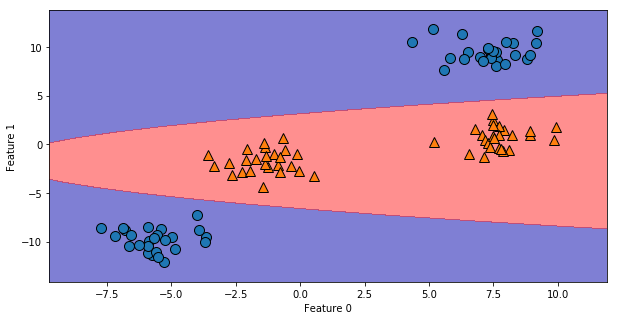

In [260]:
ZZ = YY ** 2
plt.figure(figsize=(10,5))
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

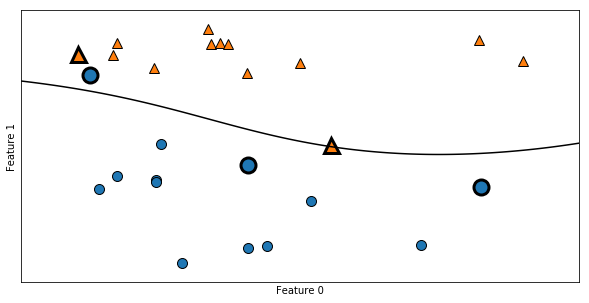

In [261]:
# radial basis function (RBF) kernel, also known as the Gaussian kernel.

from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
plt.figure(figsize=(10,5))
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

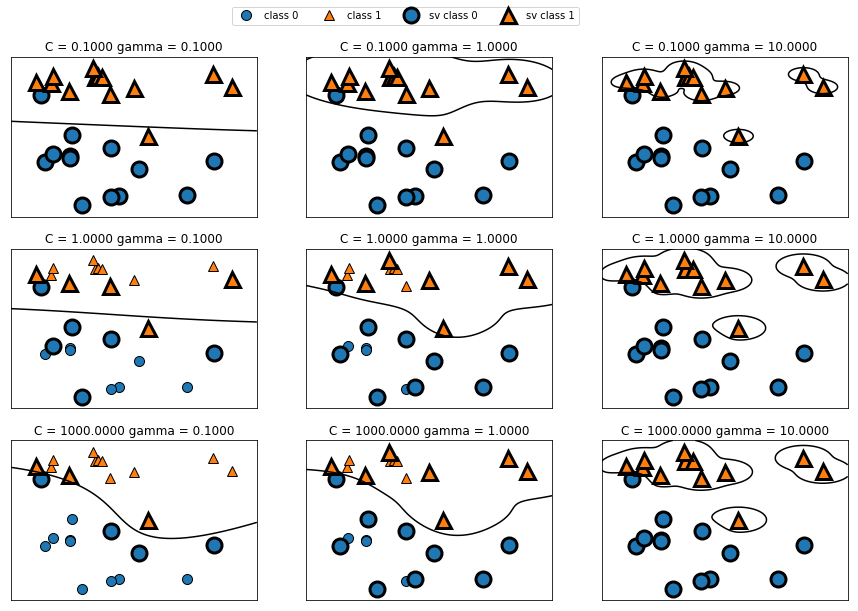

In [262]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
ncol=4, loc=(.9, 1.2))

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X_mul,y_mul, random_state=42)

svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))


Accuracy on training set: 0.55
Accuracy on test set: 0.55


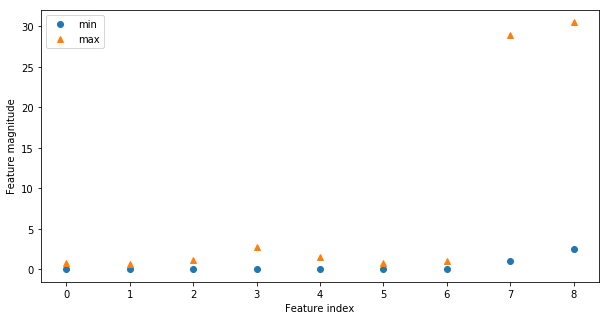

In [264]:
plt.figure(figsize=(10,5))
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=2)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

# For SVN Preprocessing is very important.

## Conclusions about Kernelized Support Vector Machines

* SVMs allow for complex decision boundaries, even if the data has only a few features.

* They work very well on high- and low- dimensional data.

* Quite poor scaling with the number of samples (more than 100000 can be a headache).

* SVMs require very careful tuning of parameters and preprocesing of data.

# General Conclusion

* **Nearest neighbors**: For small datasets, good as a baseline, easy to explain.
* **Linear models**: Go-to as a first algorithm to try, good for very large datasets, good for very highdimensional data.
* **Naive Bayes**: Only for classification. Even faster than linear models, good for very large data sets and high-dimensional data. Often less accurate than linear models.
* **Decision trees**: Very fast, don't need scaling of the data, can be visualized and easily explained.
* **Random forests**: Nearly always perform better than a single decision tree, very robust and powerful. Don’t need scaling of data. Not good for very high-dimensional sparse data.
* **Gradient boosted decision trees**: Often slightly more accurate than random forests. Slower to train but faster to predict than random forests, and smaller in memory. Need more parameter tuning than random forests.
* **Support vector machines**: Powerful for medium-sized datasets of features with similar meaning. Require scaling of data, sensitive to parameters.

# Second homework

Try at least 3 different classifiers on the 20 newsgroups dataset. Report the performance and accuracy.


10 mins break...?


# Unsupervised Learning
* Unsupervised learning subsumes all kinds of machine learning where there is no known output, no teacher to instruct the learning algorithm. 

* In unsupervised learning, the learning algorithm is just shown the input data and asked to extract knowledge from this data.

## Dataset transformations 
* summarizes the essential characteristics of high dimensional data with fewer features.
* finding the parts or components that 'make up' the data.

## Clustering.
* Partition data into distinct groups of similar items.

1. <a href="#/57/1">Preprocessing and Scaling</a>:
   
2. <a href="#/60/1">Dimensionality Reduction, Feature Extraction, and Manifold Learning</a>:
   * Principal Component Analysis (PCA).
   * Non-Negative Matrix Factorization (NMF)
   * Manifold Learning with t-SNE

3. <a href="#/75/1">Clustering</a>:
   * k-Means Clustering.
   * Agglomerative Clustering.
   * DBSCAN.

# Preprocessing and Scaling

Some algorithms such as SVM are very sensitive to the scaling of data.

* *StandardScaler*: for each feature the mean is 0 and the variance is 1. Same magnitude.
* *RobustScaler*: Similar to StandardScaler but with the guarantee that they are on the same scale. It uses the median and quartiles.
* *MinMaxScaler*: Shifts the data such that all features are exactly between 0 and 1.

* *Normalizer*: It scales each data point such that the feature vector has a Euclidean length of 1. 

<a href="#/56/1">(Index)</a>

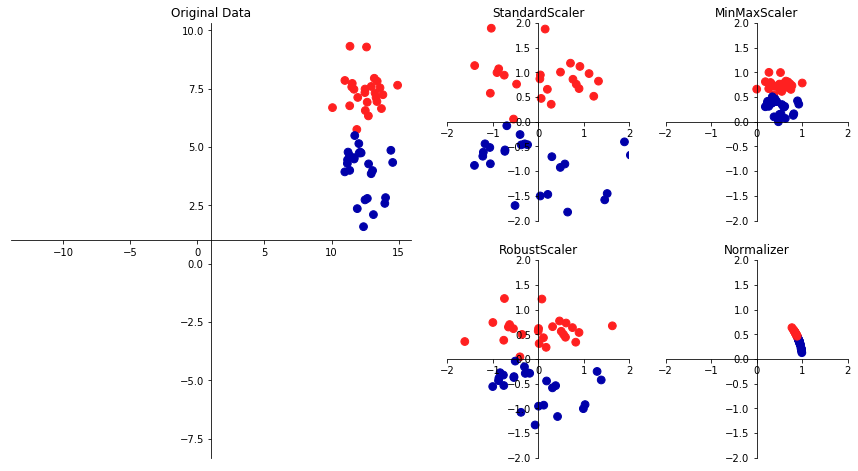

In [265]:
mglearn.plots.plot_scaling()

In [266]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_mul,y_mul, random_state=42)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))


Test set accuracy: 0.55


In [267]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.59


In [268]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.57


# Dimensionality Reduction, Feature Extraction, and Manifold Learning

The most common motivations for transforming data using unsupervised learning are visualization, compressing the data, and finding a representation that is more informative for further processing.

<a href="#/56/1">(Index)</a>

# Principal Component Analysis (PCA)

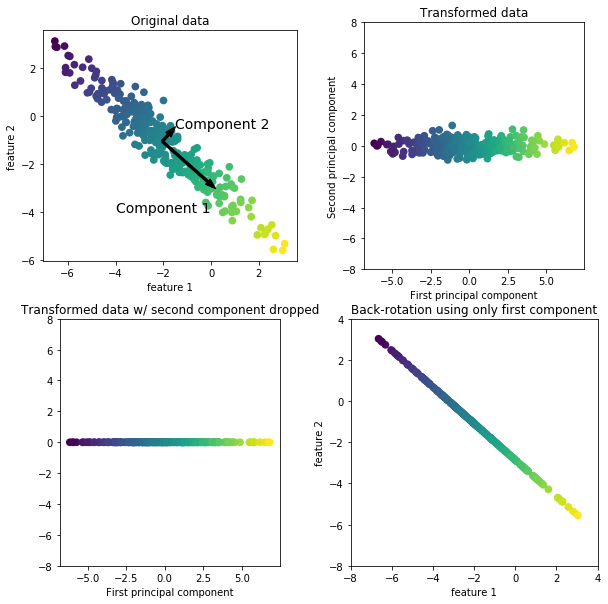

In [269]:
mglearn.plots.plot_pca_illustration()

rotates the dataset in a way such that the rotated features are statistically uncorrelated.

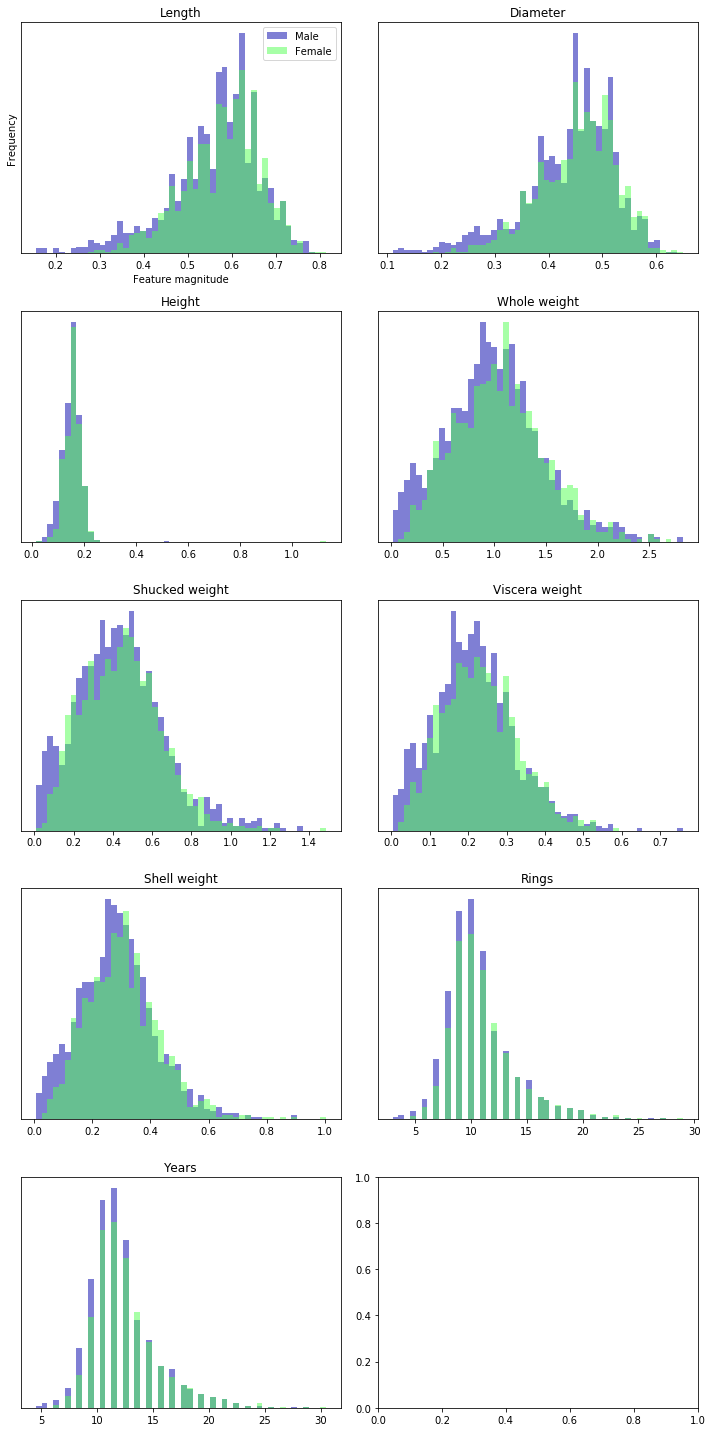

In [270]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
Male = X_bin[y_bin == 0]
Female = X_bin[y_bin == 1]
ax = axes.ravel()
for i in range(9):
    _, bins = np.histogram(X_bin[:, i], bins=50)
    ax[i].hist(Male[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(Female[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(new_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["Male", "Female"], loc="best")
fig.tight_layout()

In [271]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_bin)
X_scaled = scaler.transform(X_bin)

In [272]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (2835, 9)
Reduced shape: (2835, 2)


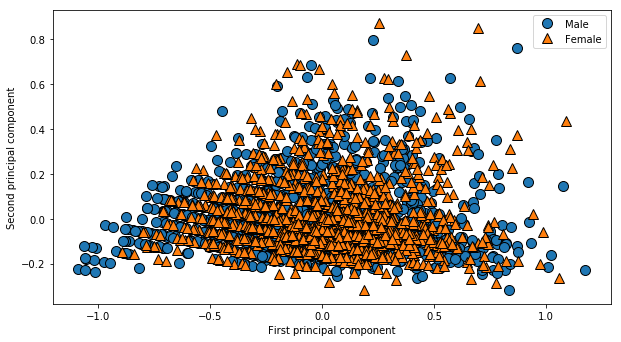

In [273]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(10, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_bin)
plt.legend(['Male','Female'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [274]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 9)


In [275]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.40591522  0.40797162  0.07199024  0.46154525  0.38790092  0.36924533
   0.35222275  0.14091712  0.14091712]
 [-0.08061665 -0.05064503  0.00891364 -0.0871706  -0.2253783  -0.10870655
   0.08540998  0.67577752  0.67577752]]


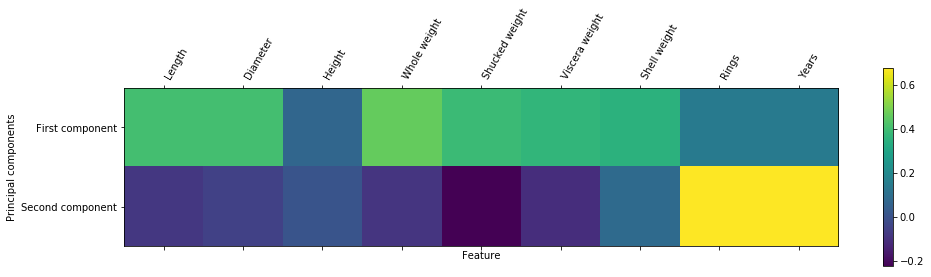

In [276]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(new_names)), new_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# Non-Negative Matrix Factorization (NMF)

* As in PCA, we are trying to write each data point as a weighted sum of some components. 

* But whereas in PCA we wanted components that were orthogonal and that explained as much variance of the data as possible, in NMF, we want the components and the coefficients to be non-negative.

* We want both the components and the coefficients to be greater than or equal to zero. Consequently, this method can only be applied to data where each feature is non-negative.

* Helpful for data that is created as the addition (or overlay) of several independent sources such as music or pictures.

<a href="#/56/1">(Index)</a>

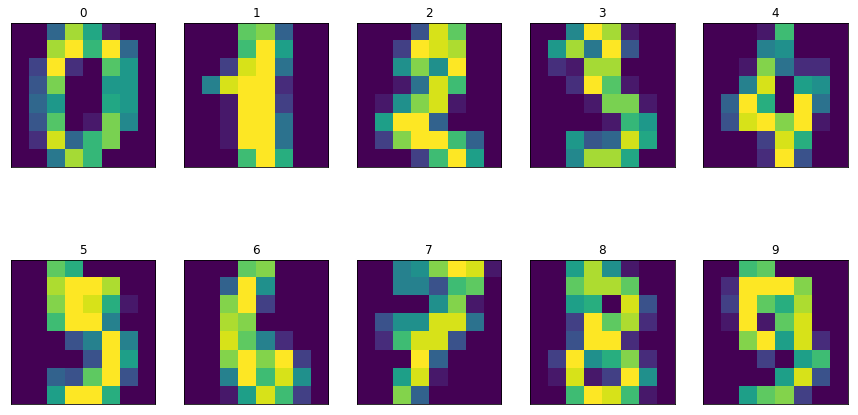

In [277]:
from sklearn.datasets import load_digits
digits = load_digits()

image_shape = digits.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(digits.target, digits.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(digits.target_names[target])

In [278]:
print("people.images.shape: {}".format(digits.images.shape))
print("Number of classes: {}".format(len(digits.target_names)))

people.images.shape: (1797, 8, 8)
Number of classes: 10


In [279]:
mask = np.zeros(digits.target.shape, dtype=np.bool)
for target in np.unique(digits.target):
    mask[np.where(digits.target == target)[0][:50]] = 1
    
X_digits = digits.data[mask]
y_digits = digits.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_digits = X_digits / 255.

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, stratify=y_digits, random_state=0)

pca = PCA(n_components=64, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (375, 64)


In [281]:
#mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

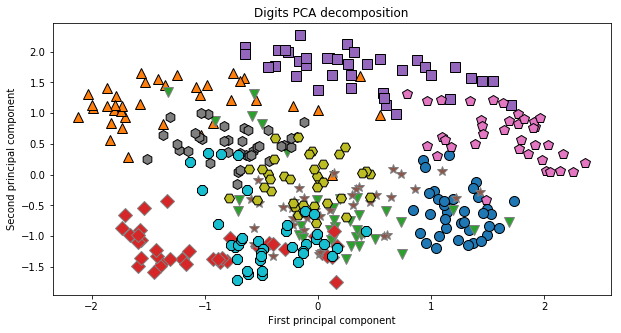

In [282]:
plt.figure(figsize=(10,5))
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.title('Digits PCA decomposition')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [283]:
#mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

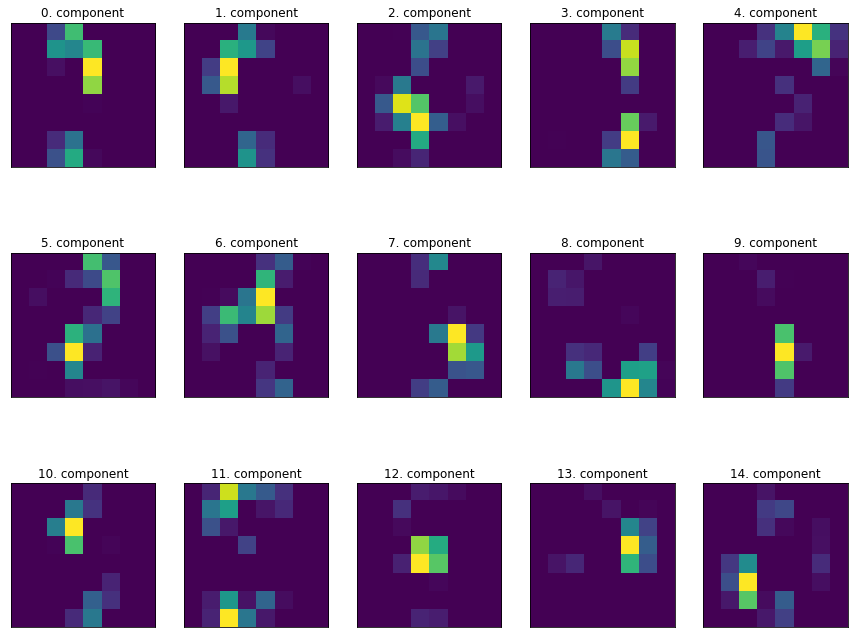

In [284]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

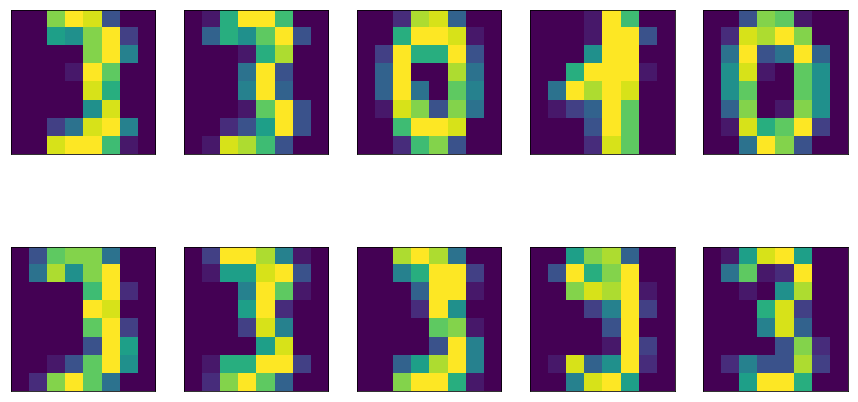

In [285]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

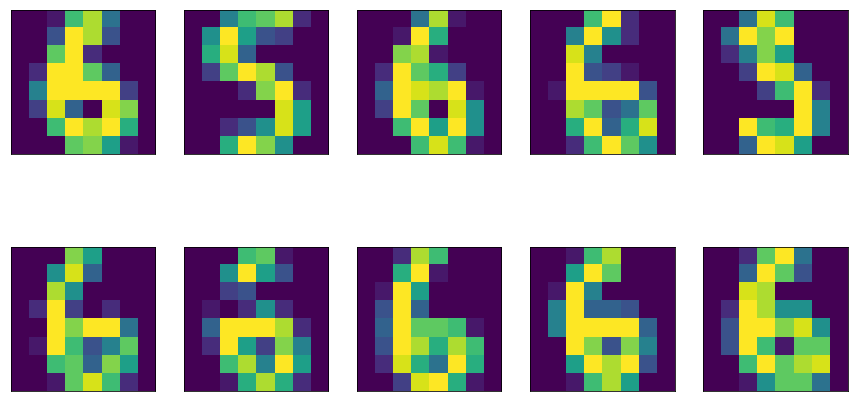

In [286]:
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

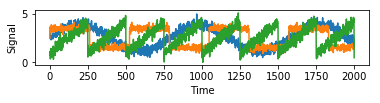

In [287]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [288]:
# mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [289]:
# mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [290]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [291]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

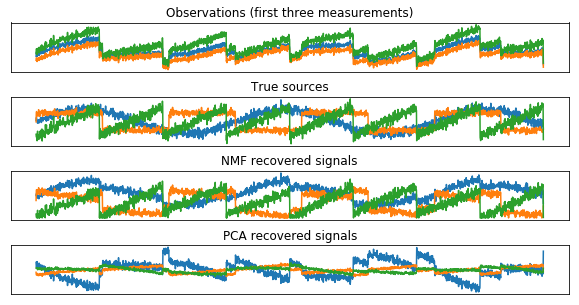

In [292]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
'True sources',
'NMF recovered signals',
'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(10, 5), gridspec_kw={'hspace': .5},
subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

# Manifold Learning with t-SNE

* t-distributed Stochastic Neighbor Embedding, developed by Geoffrey Hinton and Laurens van der Maaten.

* PCA is often a good first approach for transforming your data so that you might be able to visualize it using a scatter plot.

* Manifold learning algorithms are mainly aimed at visualization.

<a href="#/56/1">(Index)</a>

In [293]:
# build a PCA model
def get_pca_fig(cp=2):
    pca = PCA(n_components=cp)
    pca.fit(digits.data)
    # transform the digits data onto the first two principal components
    digits_pca = pca.transform(digits.data)
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
    "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
    plt.figure(figsize=(10, 10))
    plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
    plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
    for i in range(len(digits.data)):
        # actually plot the digits as text instead of using scatter
        plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
        color = colors[digits.target[i]],
        fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("First principal component")
    plt.ylabel("Second principal component")

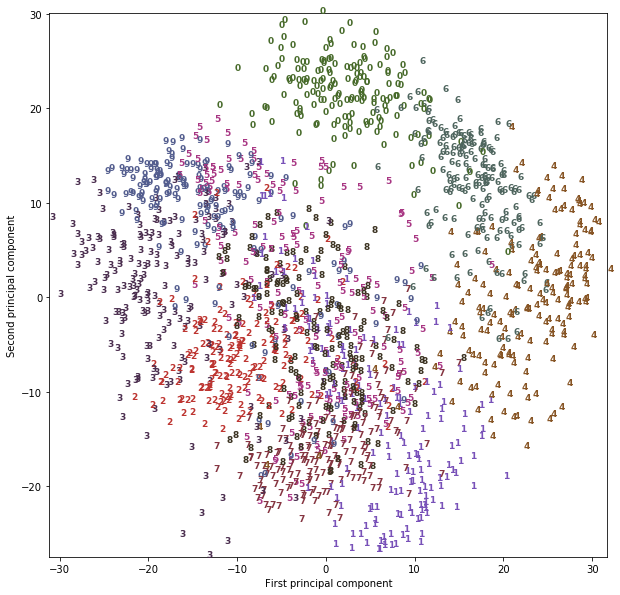

In [294]:
get_pca_fig()

In [295]:
from sklearn.manifold import TSNE

def get_tsne_fig():
    
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
    "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
    
    tsne = TSNE(random_state=42)
    # use fit_transform instead of fit, as TSNE has no transform method
    digits_tsne = tsne.fit_transform(digits.data)

    plt.figure(figsize=(10, 10))
    plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
    plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
    for i in range(len(digits.data)):
        # actually plot the digits as text instead of using scatter
        plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
        color = colors[digits.target[i]],
        fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("t-SNE feature 0")
    plt.xlabel("t-SNE feature 1")

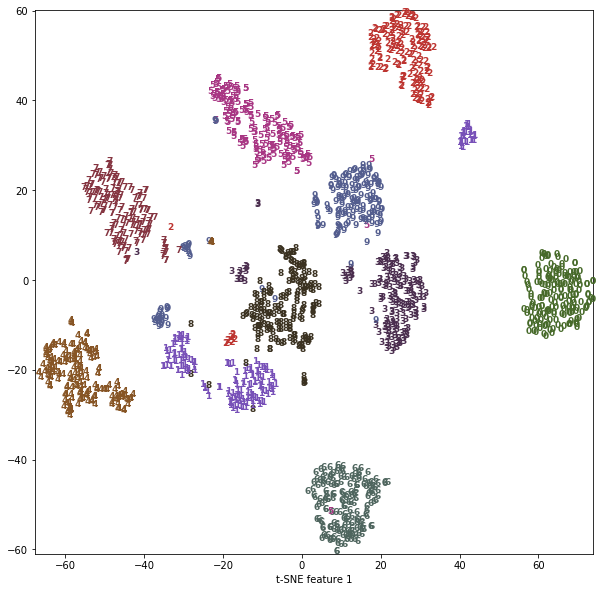

In [296]:
get_tsne_fig()

# Clustering

* Clustering is the task of partitioning the dataset into groups, called clusters.

* The goal is to split up the data in such a way that points within a single cluster are very similar and points in different clusters are different.

<a href="#/56/1">(Index)</a>

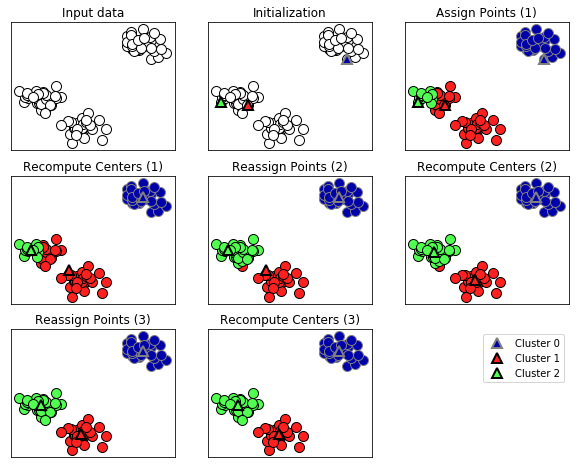

In [297]:
mglearn.plots.plot_kmeans_algorithm()


k-Means Clustering

In [298]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def get_kmeans_figs():
    X, y = make_blobs(random_state=1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # using two cluster centers:
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X)
    assignments = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
    # using five cluster centers:
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(X)
    assignments = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

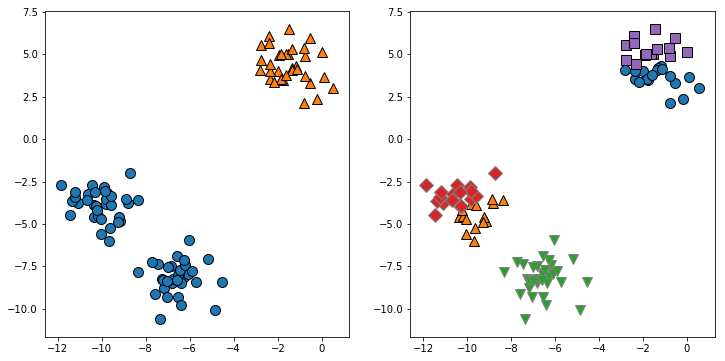

In [299]:
get_kmeans_figs()

# Agglomerative Clustering

* It refers to a collection of clustering algorithms that all build upon the same principles: the algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied.

* There are several linkage criteria that specify how exactly the “most similar cluster” is measured.
     * ward
     * average
     * complete

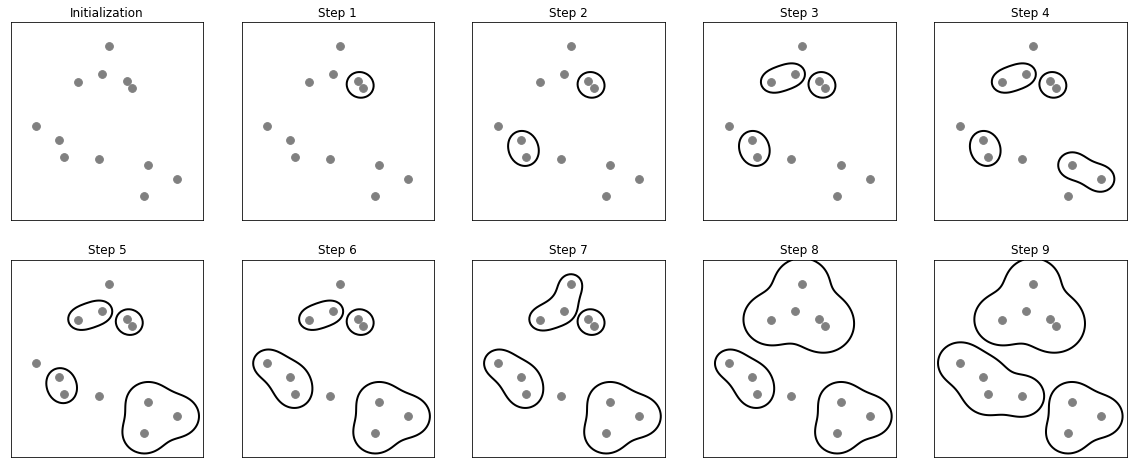

In [300]:
mglearn.plots.plot_agglomerative_algorithm()

# DBSCAN

* Density-Based Spatial Clustering of Applications with Noise.
* It does not require the user to set the number of clusters a priori.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


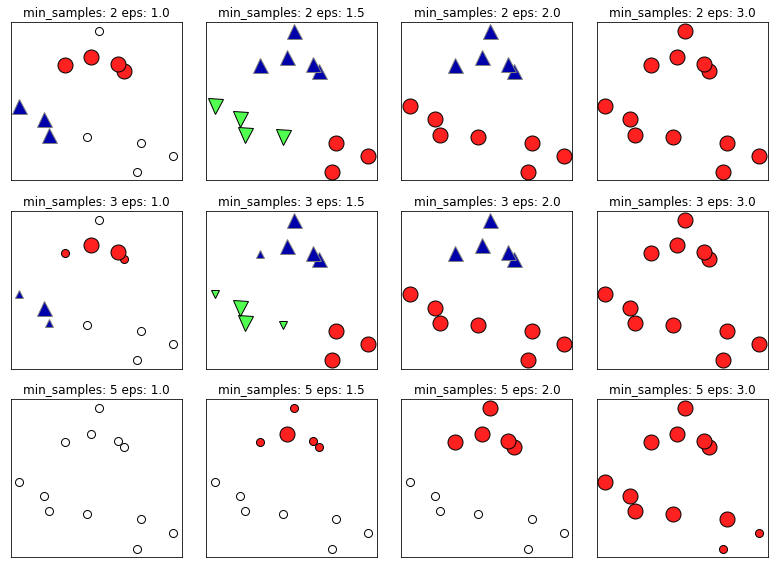

In [301]:
mglearn.plots.plot_dbscan()

# Conclusions about Clustering Methods

*  k-means, DBSCAN, and agglomerative clustering have a way of controlling the granularity of clustering.
* k-means and agglomerative clustering allow you to specify the number of desired clusters, while DBSCAN lets you define proximity using the eps parameter, which indirectly influences cluster size.
* All three methods can be used on large, real-world datasets, are relatively easy to understand, and allow for clustering into many clusters.

# Third homework

Try at least 2 different unsupervised methods on the 20 newsgroups dataset. Report the performance and accuracy.


# General Conclusion

* Copy and paste an algorithm for any given problem is the zero step. The most important part is rehearse and explore different methods as much as you can on different interesting problems. 

* Simplicity is a virtue by itself. **Occam's razor**.

* The best way to stand out over the crowd is try to understand the concepts (and the maths) behind the algorithms.

My recommendation: https://web.stanford.edu/~hastie/ElemStatLearn/

<img src="./images/02-eosl.jpg" alt="Drawing" style="width: 200px;"/>

